In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from joblib import dump, load
from scipy.ndimage.filters import generic_filter as gf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
ditches_1 = np.load("../feature_extracted/3_zones_features/zone1/Ditches_width3_zone1.npy")

hp_raw_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_zone1_raw.npy")
hp_m2_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_mean2_zone1.npy")
hp_m3_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_mean3_zone1.npy")
hp_m4_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_mean4_zone1.npy")
hp_m6_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_mean6_zone1.npy")
hp_md2_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_median2_zone1.npy")
hp_md4_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_median4_zone1.npy")
hp_md6_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_median6_zone1.npy")
hp_std6_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_std6_zone1.npy")
hp_sk2_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_zone1_skew_2x2.npy")
hp_f_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_custom_filter_zone1.npy")

im_raw_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_zone1_raw.npy")
im_m2_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_mean2_zone1.npy")
im_m3_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_mean3_zone1.npy")
im_m4_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_mean4_zone1.npy")
im_m6_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_mean6_zone1.npy")
im_md2_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_median2_zone1.npy")
im_md4_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_median4_zone1.npy")
im_md6_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_median6_zone1.npy")
im_std6_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_std6_zone1.npy")
im_sk2_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_zone1_skew_2x2.npy")
im_f_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_amplification_10_10_10_zone1.npy")

sv_raw_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_zone1_raw.npy")
sv_m2_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_mean2_zone1.npy")
sv_m3_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_mean3_zone1.npy")
sv_m4_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_mean4_zone1.npy")
sv_m6_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_mean6_zone1.npy")
sv_md2_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_median2_zone1.npy")
sv_md4_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_median4_zone1.npy")
sv_md6_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_median6_zone1.npy")
sv_std6_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_std6_zone1.npy")
sv_sk2_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_zone1_skew_2x2.npy")
sv_conic_old_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_cone_5_0975_mean4_opening4_zone1.npy")
sv_conic_new_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_conic_new_zone1.npy")
sv_non_ditch_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_non_ditch_amplification_25_10_zone1.npy")

sl_raw_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_zone1_raw.npy")
sl_m2_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_mean2_zone1.npy")
sl_m3_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_mean3_zone1.npy")
sl_m4_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_mean4_zone1.npy")
sl_m6_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_mean6_zone1.npy")
sl_md2_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_median2_zone1.npy")
sl_md4_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_median4_zone1.npy")
sl_md6_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_median6_zone1.npy")
sl_std6_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_std6_zone1.npy")
sl_sk2_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_zone1_skew_2x2.npy")
sl_non_ditch_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_non_ditch_amplification_35_15_zone1.npy")

In [4]:
ditches_2 = np.load("../feature_extracted/3_zones_features/zone2/Ditches_width3_zone2.npy")

hp_raw_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_zone2_raw.npy")
hp_m2_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_mean2_zone2.npy")
hp_m3_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_mean3_zone2.npy")
hp_m4_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_mean4_zone2.npy")
hp_m6_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_mean6_zone2.npy")
hp_md2_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_median2_zone2.npy")
hp_md4_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_median4_zone2.npy")
hp_md6_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_median6_zone2.npy")
hp_std6_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_std6_zone2.npy")
hp_sk2_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_zone2_skew_2x2.npy")
hp_f_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_custom_filter_zone2.npy")

im_raw_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_zone2_raw.npy")
im_m2_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_mean2_zone2.npy")
im_m3_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_mean3_zone2.npy")
im_m4_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_mean4_zone2.npy")
im_m6_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_mean6_zone2.npy")
im_md2_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_median2_zone2.npy")
im_md4_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_median4_zone2.npy")
im_md6_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_median6_zone2.npy")
im_std6_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_std6_zone2.npy")
im_sk2_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_zone2_skew_2x2.npy")
im_f_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_amplification_10_10_10_zone2.npy")

sv_raw_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_zone2_raw.npy")
sv_m2_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_mean2_zone2.npy")
sv_m3_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_mean3_zone2.npy")
sv_m4_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_mean4_zone2.npy")
sv_m6_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_mean6_zone2.npy")
sv_md2_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_median2_zone2.npy")
sv_md4_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_median4_zone2.npy")
sv_md6_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_median6_zone2.npy")
sv_std6_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_std6_zone2.npy")
sv_sk2_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_zone2_skew_2x2.npy")
sv_conic_old_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_cone_5_0975_mean4_opening4_zone2.npy")
sv_conic_new_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_conic_new_zone2.npy")
sv_non_ditch_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_non_ditch_amplification_25_10_zone2.npy")

sl_raw_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_zone2_raw.npy")
sl_m2_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_mean2_zone2.npy")
sl_m3_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_mean3_zone2.npy")
sl_m4_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_mean4_zone2.npy")
sl_m6_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_mean6_zone2.npy")
sl_md2_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_median2_zone2.npy")
sl_md4_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_median4_zone2.npy")
sl_md6_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_median6_zone2.npy")
sl_std6_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_std6_zone2.npy")
sl_sk2_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_zone2_skew_2x2.npy")
sl_non_ditch_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_non_ditch_amplification_35_15_zone2.npy")

In [5]:
ditches_3 = np.load("../feature_extracted/3_zones_features/zone3/Ditches_width3_zone3.npy")

hp_raw_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_zone3_raw.npy")
hp_m2_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_mean2_zone3.npy")
hp_m3_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_mean3_zone3.npy")
hp_m4_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_mean4_zone3.npy")
hp_m6_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_mean6_zone3.npy")
hp_md2_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_median2_zone3.npy")
hp_md4_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_median4_zone3.npy")
hp_md6_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_median6_zone3.npy")
hp_std6_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_std6_zone3.npy")
hp_sk2_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_zone3_skew_2x2.npy")
hp_f_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_custom_filter_zone3.npy")

im_raw_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_zone3_raw.npy")
im_m2_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_mean2_zone3.npy")
im_m3_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_mean3_zone3.npy")
im_m4_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_mean4_zone3.npy")
im_m6_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_mean6_zone3.npy")
im_md2_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_median2_zone3.npy")
im_md4_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_median4_zone3.npy")
im_md6_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_median6_zone3.npy")
im_std6_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_std6_zone3.npy")
im_sk2_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_zone3_skew_2x2.npy")
im_f_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_amplification_10_10_10_zone3.npy")

sv_raw_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_zone3_raw.npy")
sv_m2_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_mean2_zone3.npy")
sv_m3_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_mean3_zone3.npy")
sv_m4_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_mean4_zone3.npy")
sv_m6_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_mean6_zone3.npy")
sv_md2_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_median2_zone3.npy")
sv_md4_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_median4_zone3.npy")
sv_md6_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_median6_zone3.npy")
sv_std6_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_std6_zone3.npy")
sv_sk2_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_zone3_skew_2x2.npy")
sv_conic_old_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_cone_5_0975_mean4_opening4_zone3.npy")
sv_conic_new_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_conic_new_zone3.npy")
sv_non_ditch_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_non_ditch_amplification_25_10_zone3.npy")

sl_raw_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_zone3_raw.npy")
sl_m2_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_mean2_zone3.npy")
sl_m3_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_mean3_zone3.npy")
sl_m4_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_mean4_zone3.npy")
sl_m6_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_mean6_zone3.npy")
sl_md2_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_median2_zone3.npy")
sl_md4_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_median4_zone3.npy")
sl_md6_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_median6_zone3.npy")
sl_std6_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_std6_zone3.npy")
sl_sk2_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_zone3_skew_2x2.npy")
sl_non_ditch_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_non_ditch_amplification_35_15_zone3.npy")

In [6]:
training_ditches = np.concatenate((ditches_1, ditches_3), axis = 0)
amountOfDitches = 0
for row in training_ditches:
    for pixel in row:
        if pixel == 1:
            amountOfDitches +=1
print(amountOfDitches)

319286


In [7]:
import random

def createBalancedMask(ditchArr, height, width):
    newArr = ditchArr.copy()
    print("in function")
    for i in range(0, len(ditchArr), height):
        for j in range(0, len(ditchArr[i]), width):
            zoneContainsDitches = None
            if (random.random() * 100 > 92.5):
                zoneContainsDitches = True
            for k in range(height):
                for l in range(width):
                    if ditchArr[i+k][j+l] == 1:
                        zoneContainsDitches = True
                    if zoneContainsDitches == True:
                        for m in range(height):
                            for n in range(width):
                                newArr[i+m][j+n] = 1
                    if zoneContainsDitches == True:
                        break
                if zoneContainsDitches == True:
                    break
            if zoneContainsDitches == None:
                for m in range(height):
                    for n in range(width):
                        newArr[i+m][j+n] = 0
    return newArr
                    

in function
in function
(3000, 2625)
(3000, 2625)


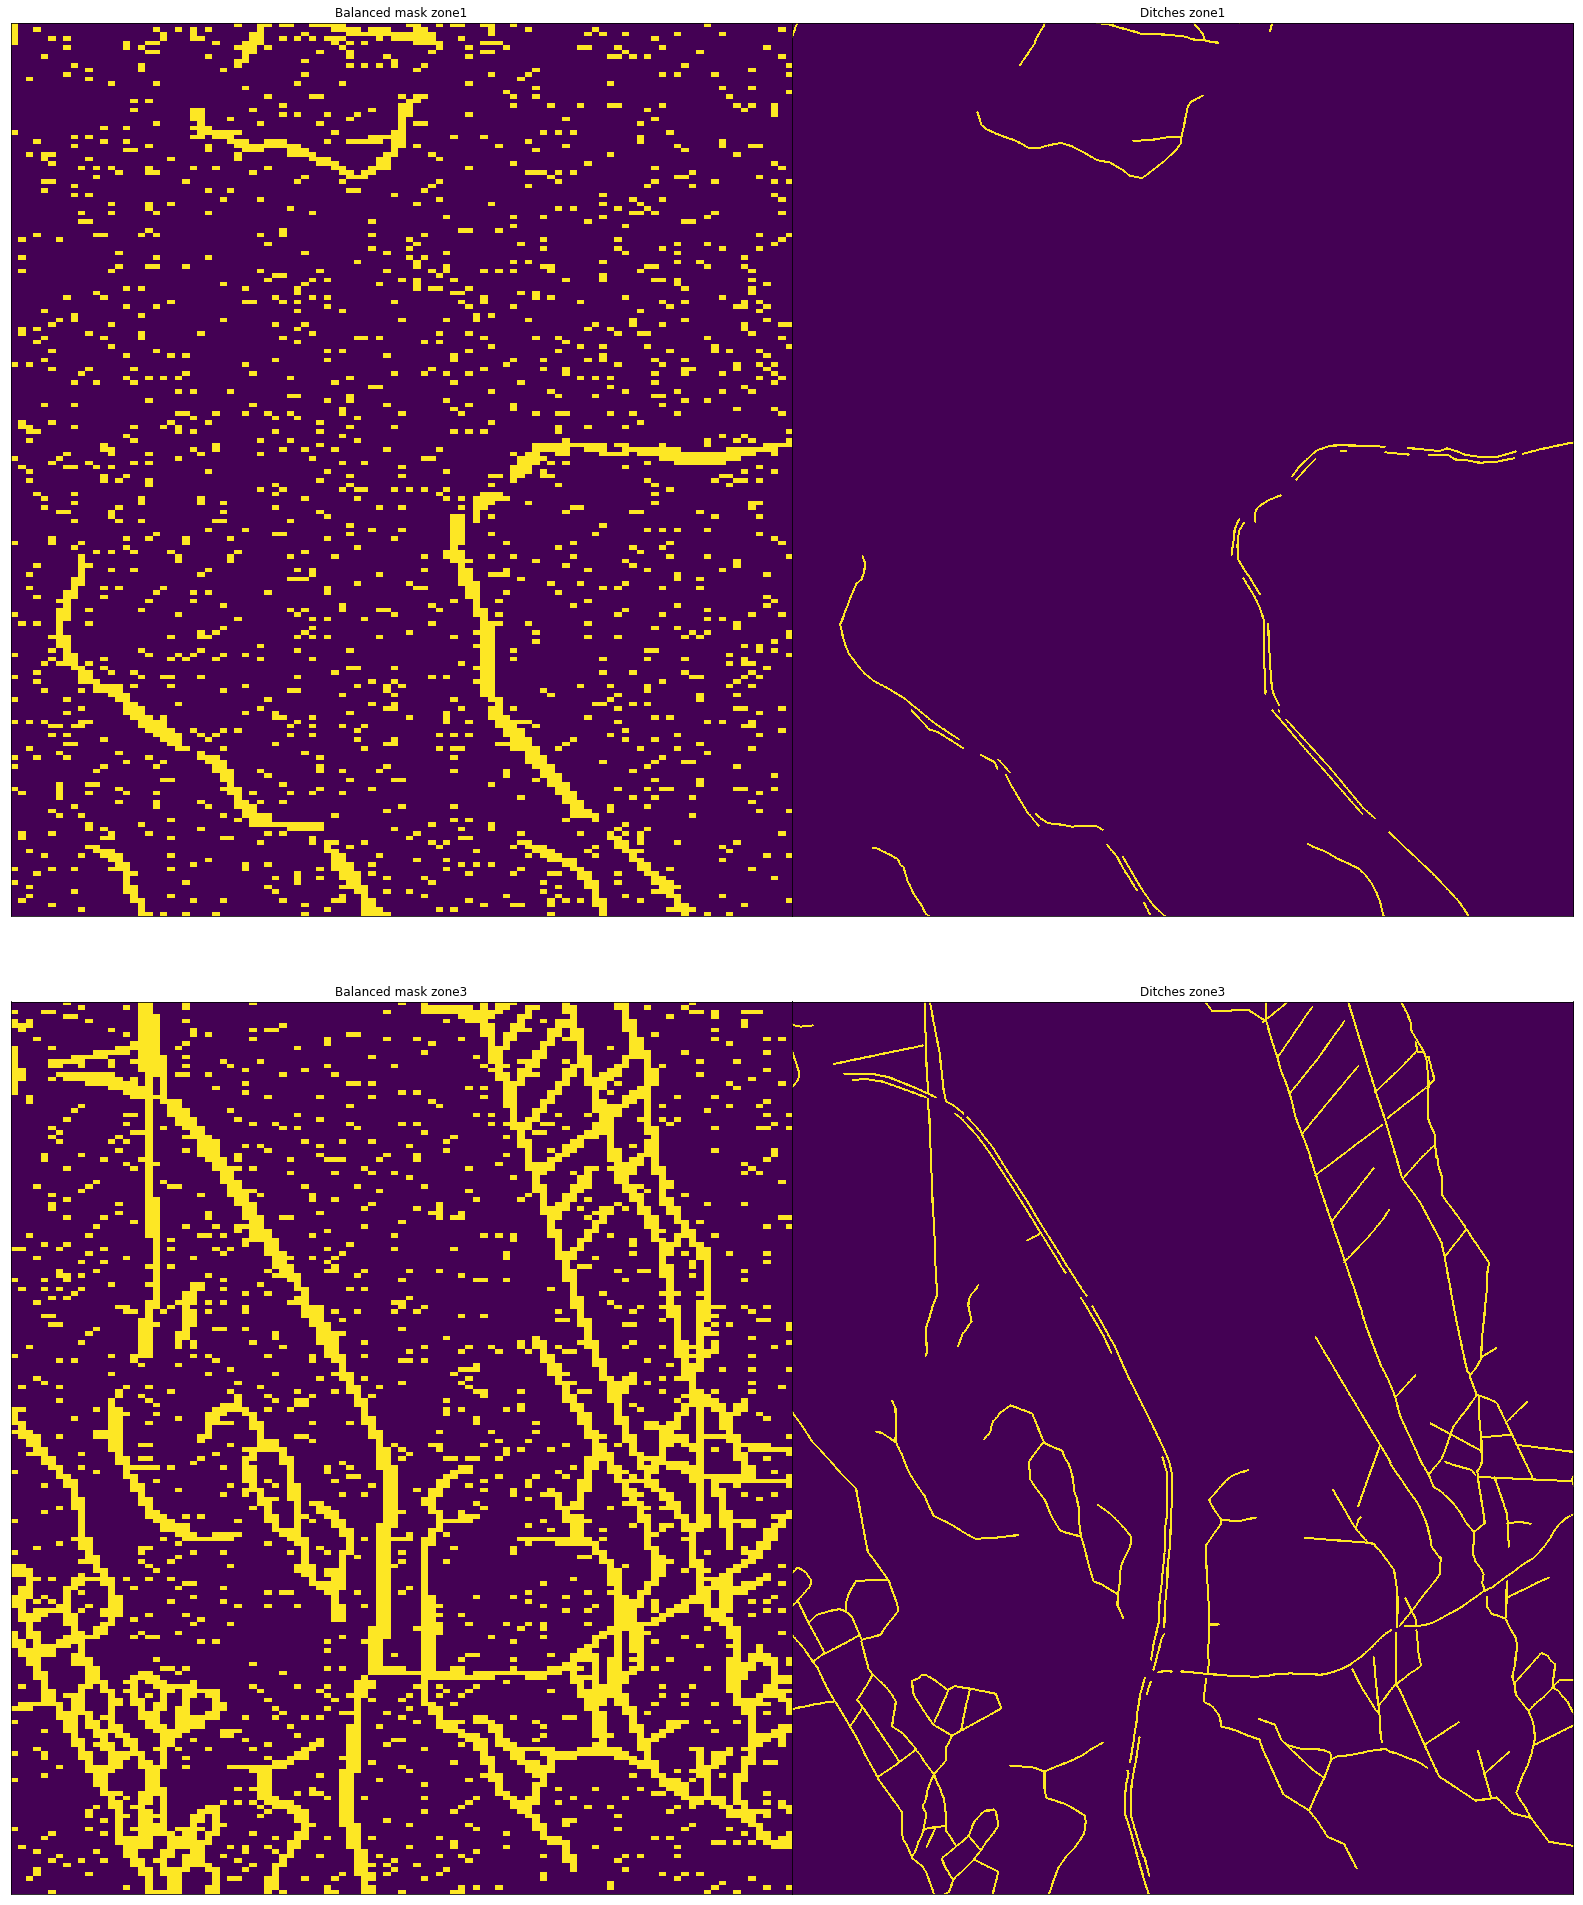

In [8]:
balancedMaskZone1 = createBalancedMask(ditches_1, 15, 25)
balancedMaskZone3 = createBalancedMask(ditches_3, 15, 25)


plt.figure(num=None, figsize=(28,36), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,2,i+1) for i in range(4)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Balanced mask zone1")
ax[0].imshow(balancedMaskZone1)
ax[1].title.set_text("Ditches zone1")
ax[1].imshow(ditches_1)
ax[2].title.set_text("Balanced mask zone3")
ax[2].imshow(balancedMaskZone3)
ax[3].title.set_text("Ditches zone3")
ax[3].imshow(ditches_3)


print(balancedMaskZone1.shape)
balancedMaskZone1 = balancedMaskZone1.reshape(2625*3000)
print(balancedMaskZone3.shape)
balancedMaskZone3 = balancedMaskZone3.reshape(2625*3000)

In [9]:
_X1 = np.dstack([hp_raw_1,hp_m2_1,hp_m3_1,hp_m4_1,hp_m6_1,hp_md2_1,hp_md4_1,hp_md6_1,hp_std6_1,hp_sk2_1,hp_f_1,im_raw_1,im_m2_1,im_m3_1,im_m4_1,im_m6_1,im_md2_1,im_md4_1,im_md6_1,im_std6_1,im_sk2_1,im_f_1,sv_raw_1,sv_m2_1,sv_m3_1,sv_m4_1,sv_m6_1,sv_md2_1,sv_md4_1,sv_md6_1,sv_std6_1,sv_sk2_1,sv_conic_old_1,sv_conic_new_1,sv_non_ditch_1,sl_raw_1,sl_m2_1,sl_m3_1,sl_m4_1,sl_m6_1,sl_md2_1,sl_md4_1,sl_md6_1,sl_std6_1,sl_sk2_1,sl_non_ditch_1])
_X1 = _X1.reshape(2625*3000, 46)





X_test = np.dstack([hp_raw_2,hp_m2_2,hp_m3_2,hp_m4_2,hp_m6_2,hp_md2_2,hp_md4_2,hp_md6_2,hp_std6_2,hp_sk2_2,hp_f_2,im_raw_2,im_m2_2,im_m3_2,im_m4_2,im_m6_2,im_md2_2,im_md4_2,im_md6_2,im_std6_2,im_sk2_2,im_f_2,sv_raw_2,sv_m2_2,sv_m3_2,sv_m4_2,sv_m6_2,sv_md2_2,sv_md4_2,sv_md6_2,sv_std6_2,sv_sk2_2,sv_conic_old_2,sv_conic_new_2,sv_non_ditch_2,sl_raw_2,sl_m2_2,sl_m3_2,sl_m4_2,sl_m6_2,sl_md2_2,sl_md4_2,sl_md6_2,sl_std6_2,sl_sk2_2,sl_non_ditch_2])
X_test = X_test.reshape(2625*3000, 46)

_X3 = np.dstack([hp_raw_3,hp_m2_3,hp_m3_3,hp_m4_3,hp_m6_3,hp_md2_3,hp_md4_3,hp_md6_3,hp_std6_3,hp_sk2_3,hp_f_3,im_raw_3,im_m2_3,im_m3_3,im_m4_3,im_m6_3,im_md2_3,im_md4_3,im_md6_3,im_std6_3,im_sk2_3,im_f_3,sv_raw_3,sv_m2_3,sv_m3_3,sv_m4_3,sv_m6_3,sv_md2_3,sv_md4_3,sv_md6_3,sv_std6_3,sv_sk2_3,sv_conic_old_3,sv_conic_new_3,sv_non_ditch_3,sl_raw_3,sl_m2_3,sl_m3_3,sl_m4_3,sl_m6_3,sl_md2_3,sl_md4_3,sl_md6_3,sl_std6_3,sl_sk2_3,sl_non_ditch_3])
_X3 = _X3.reshape(2625*3000, 46)

print(_X1.shape)



_y1 = ditches_1
_y1 = _y1.reshape(2625*3000)

y_test = ditches_2
y_test = y_test.reshape(2625*3000)

_y3 = ditches_3
_y3 = _y3.reshape(2625*3000)



print(_y1.shape)

(7875000, 46)
(7875000,)


In [10]:
y_train1temp = [0]
X_train1temp = [np.zeros(46)]
for i in range(len(balancedMaskZone1)):
    if balancedMaskZone1[i] == True:
        y_train1temp.append(_y1[i])
        X_train1temp.append(_X1[i])
y_train1 = np.array(y_train1temp)
X_train1 = np.array(X_train1temp)
print(y_train1.shape)
print(X_train1.shape)

y_train3temp = [0]
X_train3temp = [np.zeros(46)]
for i in range(len(balancedMaskZone3)):
    if balancedMaskZone3[i] == True:
        y_train3temp.append(_y3[i])
        X_train3temp.append(_X3[i])
y_train3 = np.array(y_train3temp)
X_train3 = np.array(X_train3temp)
print(y_train3.shape)
print(X_train3.shape)
            

        


(832126,)
(832126, 46)
(1690501,)
(1690501, 46)


In [11]:
X_train = np.concatenate((X_train1, X_train3), axis = 0)
y_train = np.concatenate((y_train1, y_train3), axis = 0)

In [12]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(2522627,)
(2522627, 46)
(7875000,)
(7875000, 46)


In [14]:
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)

clf.fit(X_train,y_train)


dump(clf, "../classifiers/190310_RF_Classifier_zone_1_3_200trees_balancedMask_21000smallZones_92_5percentRandomZones_46features.joblib")

['../classifiers/190310_RF_Classifier_zone_1_3_200trees_balancedMask_21000smallZones_92_5percentRandomZones_46features.joblib']

In [248]:
clf = load("../classifiers/190308_RF_Classifier_zone_2_3_100trees_balancedMask_21000smallZones_92_5percentRandomZones_7features.joblib")

In [15]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

y_pred = clf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

7875000
0.9916492698412699
0.6091780769864089
[[7761144   34907]
 [  30855   48094]]


In [175]:
predictProba = clf.predict_proba(X_test)

In [176]:
print(predictProba.shape)
print(predictProba[0])
print(predictProba[500])

(7875000, 2)
[0.97 0.03]
[1. 0.]


In [154]:
def probaToZones(arr, zoneSize):
    newArr = np.empty([len(arr), len(arr[0])])
    print(newArr.shape)
    for i in range(0, len(arr), zoneSize):
        for j in range(0, len(arr[i]), zoneSize):
            totalProba = 0
            if i < len(arr) - zoneSize and j < len(arr[i]) - zoneSize:
                for k in range(zoneSize):
                    for l in range(zoneSize):
                        totalProba += arr[i+k][j+l][1]
                if totalProba / zoneSize**2 > 0.2:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 1
                else:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 0
    return newArr

<BarContainer object of 46 artists>

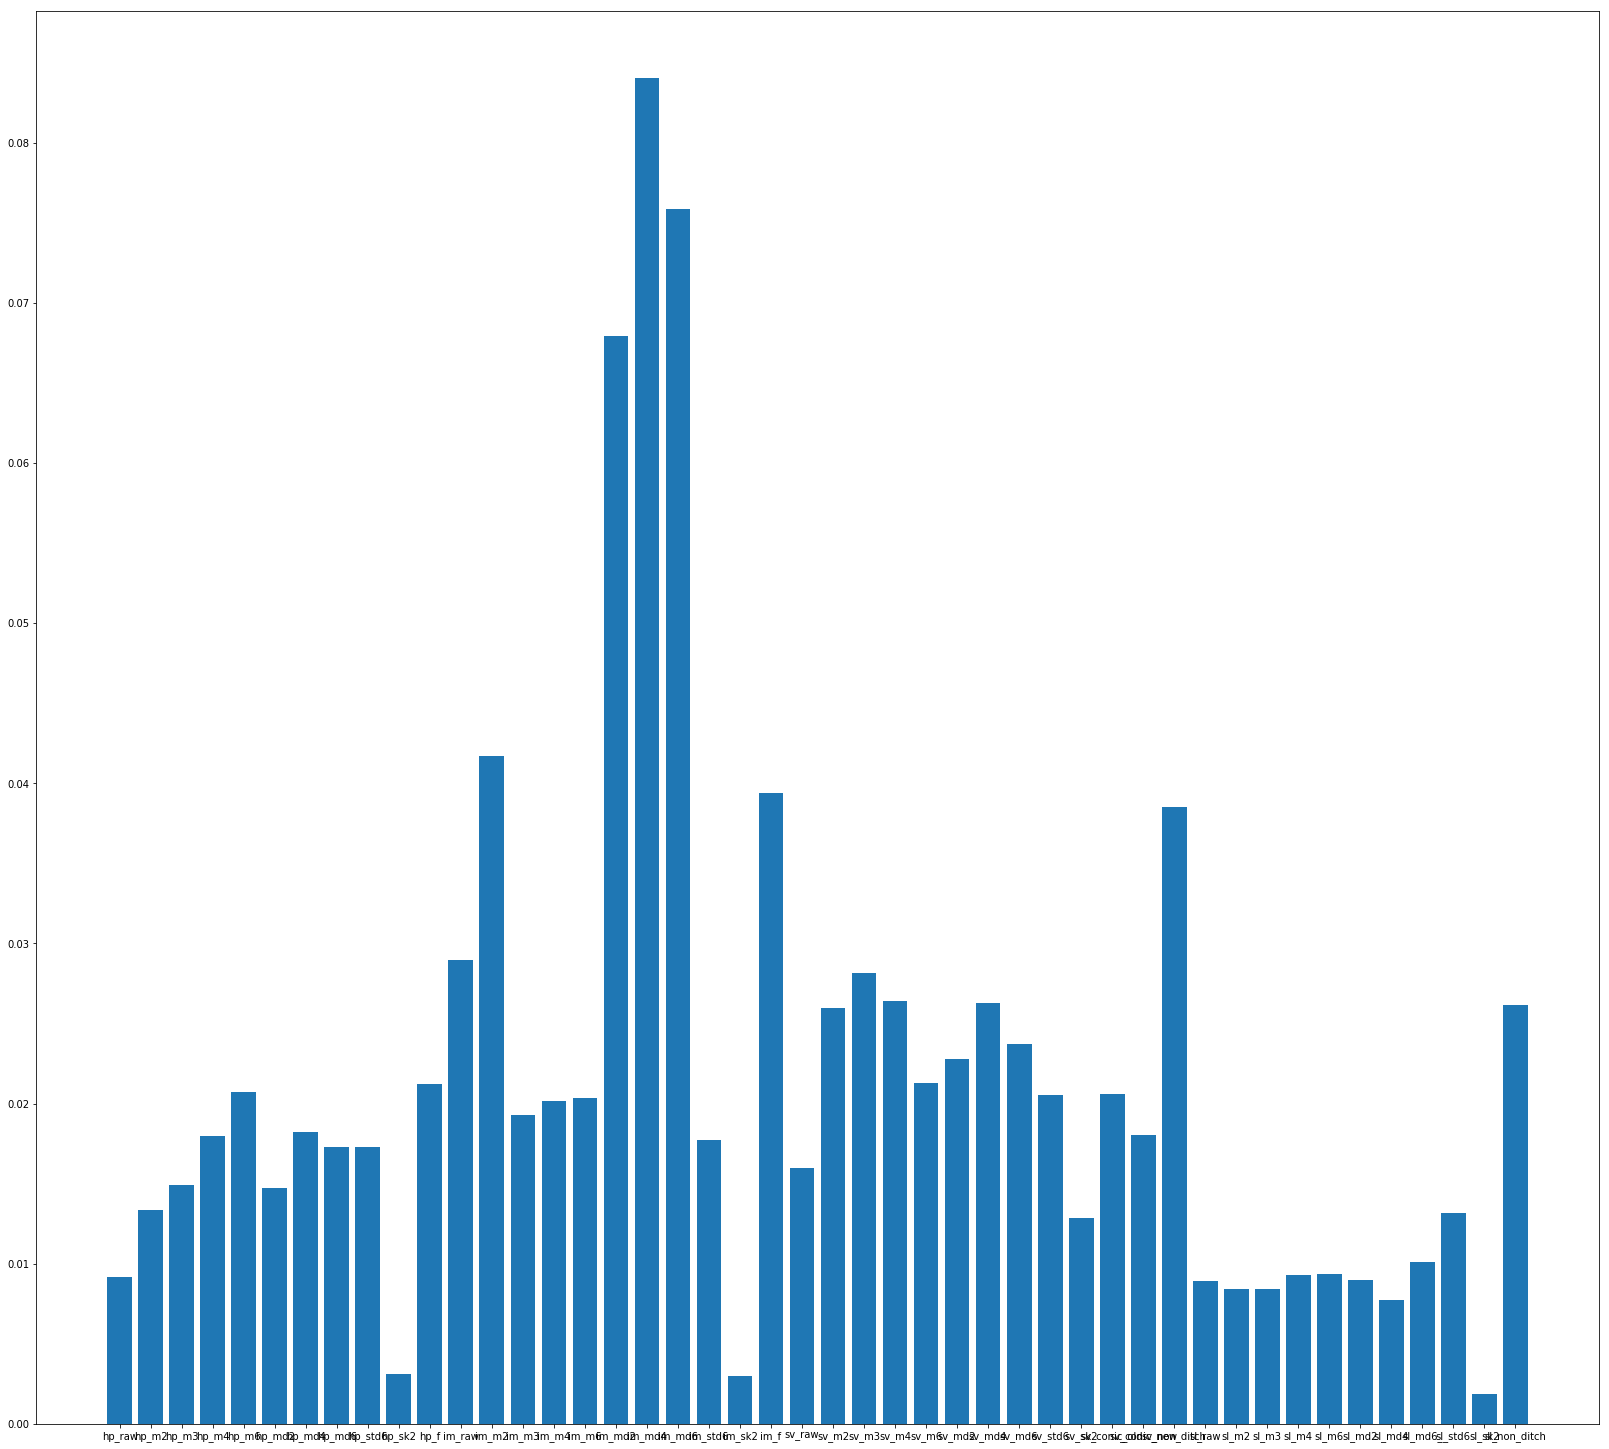

In [16]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.bar(["hp_raw","hp_m2","hp_m3","hp_m4","hp_m6","hp_md2","hp_md4","hp_md6","hp_std6","hp_sk2","hp_f","im_raw","im_m2","im_m3","im_m4","im_m6","im_md2","im_md4","im_md6","im_std6","im_sk2","im_f","sv_raw","sv_m2","sv_m3","sv_m4","sv_m6","sv_md2","sv_md4","sv_md6","sv_std6","sv_sk2","sv_conic_old","sv_conic_new","sv_non_ditch","sl_raw","sl_m2","sl_m3","sl_m4","sl_m6","sl_md2","sl_md4","sl_md6_","sl_std6","sl_sk2","sl_non_ditch"],clf.feature_importances_)

In [34]:
featureScores = clf.feature_importances_
featureNames = ["hp_raw","hp_m2","hp_m3","hp_m4","hp_m6","hp_md2","hp_md4","hp_md6","hp_std6","hp_sk2","hp_f","im_raw","im_m2","im_m3","im_m4","im_m6","im_md2","im_md4","im_md6","im_std6","im_sk2","im_f","sv_raw","sv_m2","sv_m3","sv_m4","sv_m6","sv_md2","sv_md4","sv_md6","sv_std6","sv_sk2","sv_conic_old","sv_conic_new","sv_non_ditch","sl_raw","sl_m2","sl_m3","sl_m4","sl_m6","sl_md2","sl_md4","sl_md6_","sl_std6","sl_sk2","sl_non_ditch"]
featureTuple = list(zip(featureScores, featureNames))

In [35]:
featureTupleSorted = sorted(featureTuple, reverse = True)

In [36]:
for i in range(len(features)):
    print("{}: {} %".format(featureTupleSorted[i][1], round(featureTupleSorted[i][0], 5) * 100))

im_md4: 8.405999999999999 %
im_md6: 7.5840000000000005 %
im_md2: 6.793 %
im_m2: 4.172 %
im_f: 3.9379999999999997 %
sv_non_ditch: 3.8539999999999996 %
im_raw: 2.8979999999999997 %
sv_m3: 2.8129999999999997 %
sv_m4: 2.641 %
sv_md4: 2.629 %
sl_non_ditch: 2.616 %
sv_m2: 2.596 %
sv_md6: 2.3720000000000003 %
sv_md2: 2.2800000000000002 %
sv_m6: 2.129 %
hp_f: 2.121 %
hp_m6: 2.0709999999999997 %
sv_conic_old: 2.061 %
sv_std6: 2.052 %
im_m6: 2.032 %
im_m4: 2.019 %
im_m3: 1.931 %
hp_md4: 1.8239999999999998 %
sv_conic_new: 1.807 %
hp_m4: 1.7950000000000002 %
im_std6: 1.771 %
hp_std6: 1.728 %
hp_md6: 1.727 %
sv_raw: 1.598 %
hp_m3: 1.492 %
hp_md2: 1.4749999999999999 %
hp_m2: 1.3339999999999999 %
sl_std6: 1.318 %
sv_sk2: 1.284 %
sl_md6_: 1.014 %
sl_m6: 0.9369999999999999 %
sl_m4: 0.928 %
hp_raw: 0.9199999999999999 %
sl_md2: 0.897 %
sl_raw: 0.8909999999999999 %
sl_m2: 0.845 %
sl_m3: 0.8420000000000001 %
sl_md4: 0.772 %
hp_sk2: 0.31 %
im_sk2: 0.298 %
sl_sk2: 0.188 %


In [158]:
predictProba = predictProba.reshape(3000, 2625, 2)

In [159]:
predictProba.shape

(3000, 2625, 2)

In [160]:
predictionZonesArr = probaToZones(predictProba, 6)

(3000, 2625)


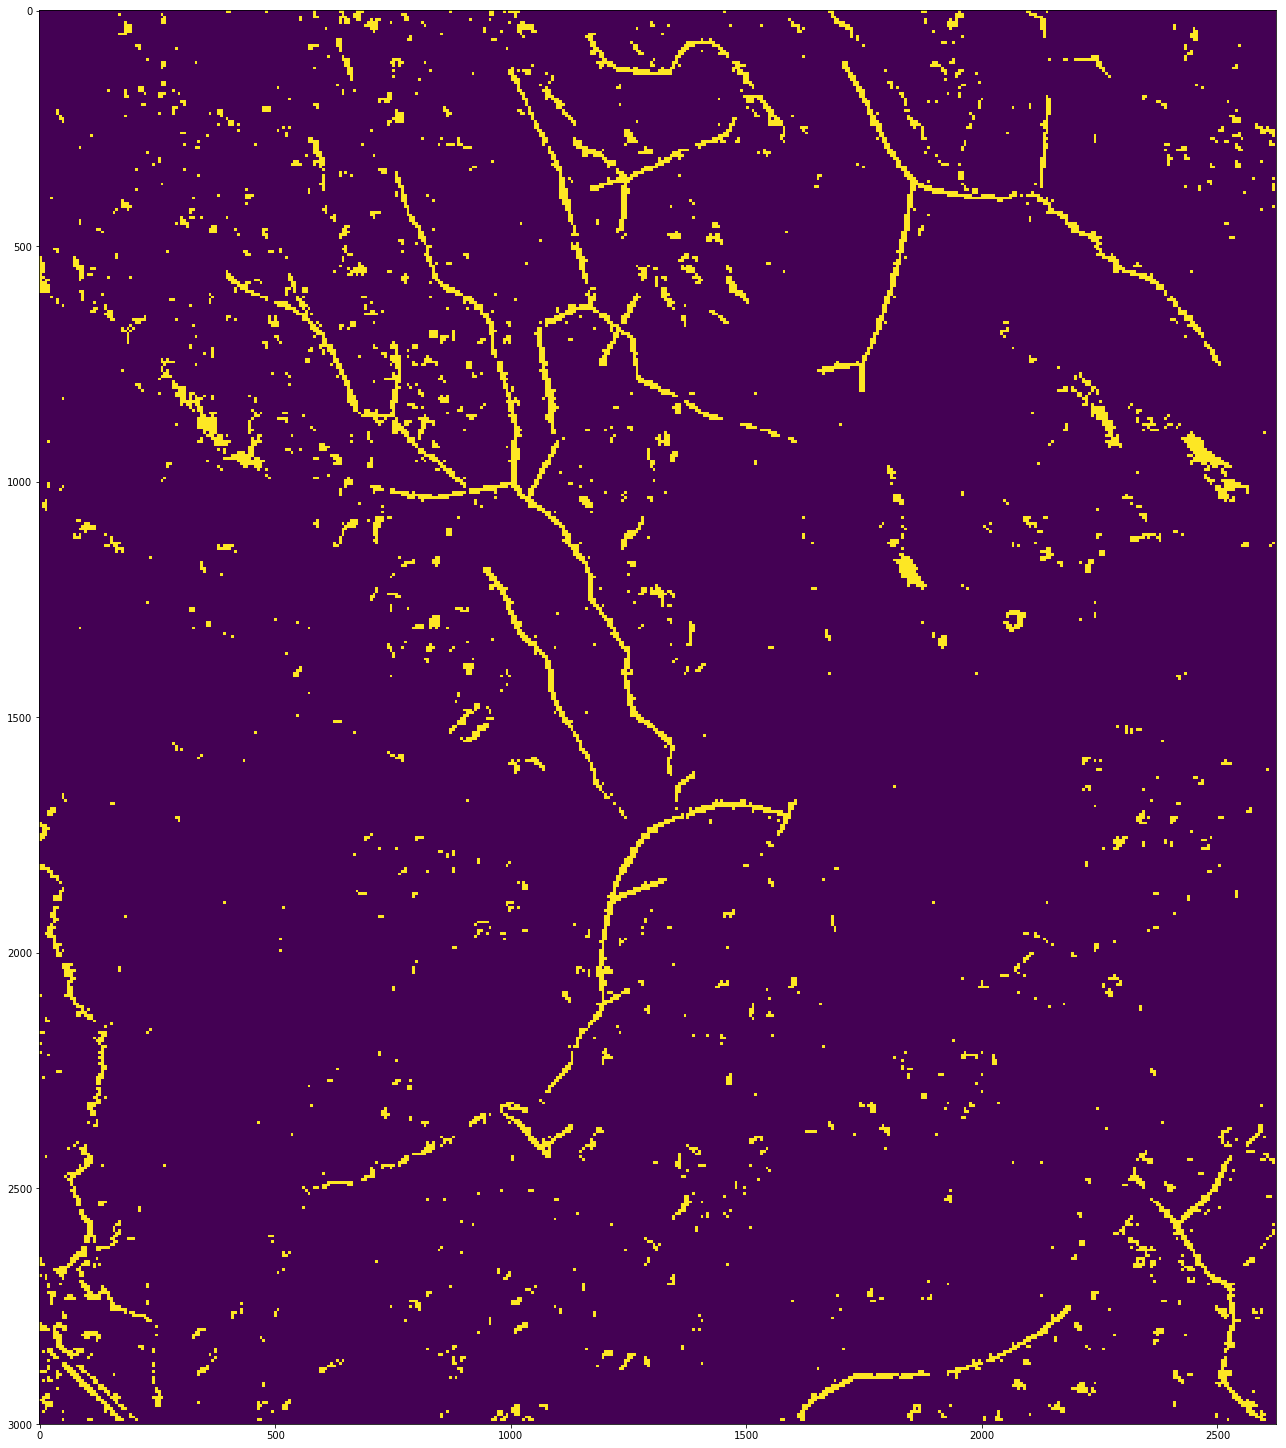

In [161]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(predictionZonesArr)

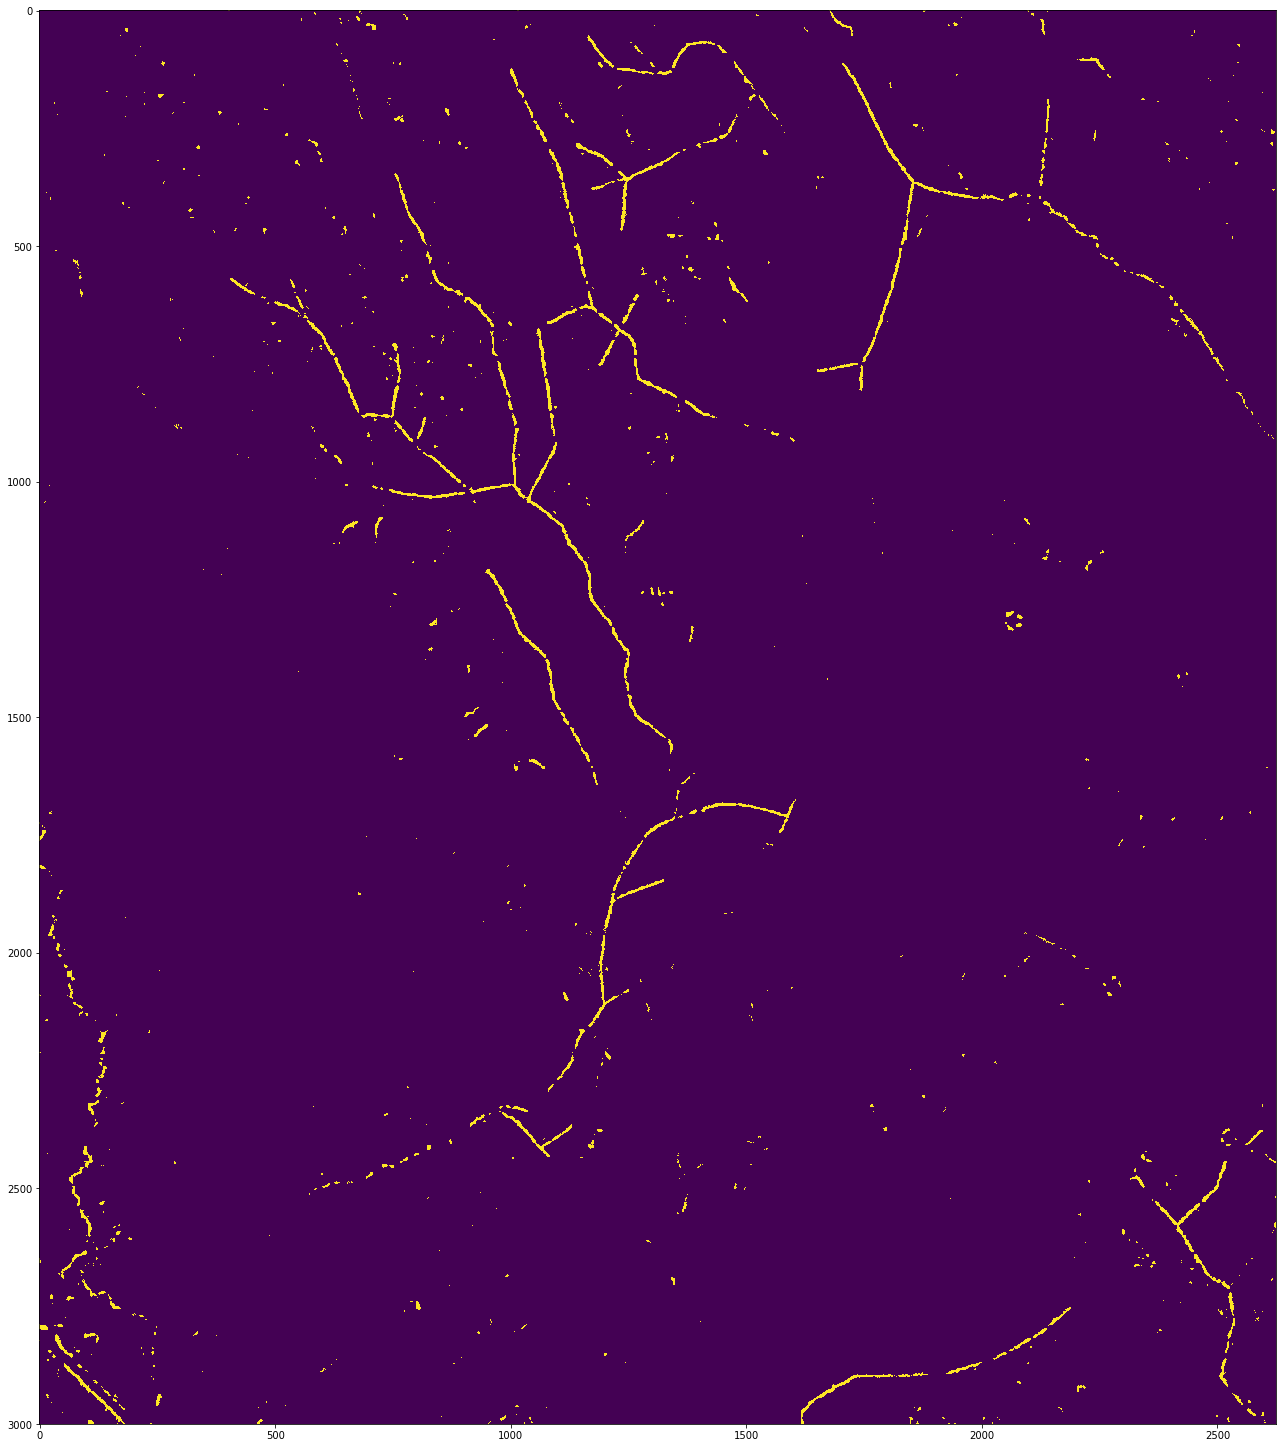

In [37]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
predictionArr = y_pred.reshape(3000, 2625)
plt.imshow(predictionArr)

In [107]:
import scipy.ndimage.morphology as morph
openedPredictionArr = morph.binary_opening(predictionArr, structure=create_circular_mask(1), iterations=2)

In [108]:
predictionArr = morph.binary_dilation(openedPredictionArr, structure=create_circular_mask(1), iterations=2)

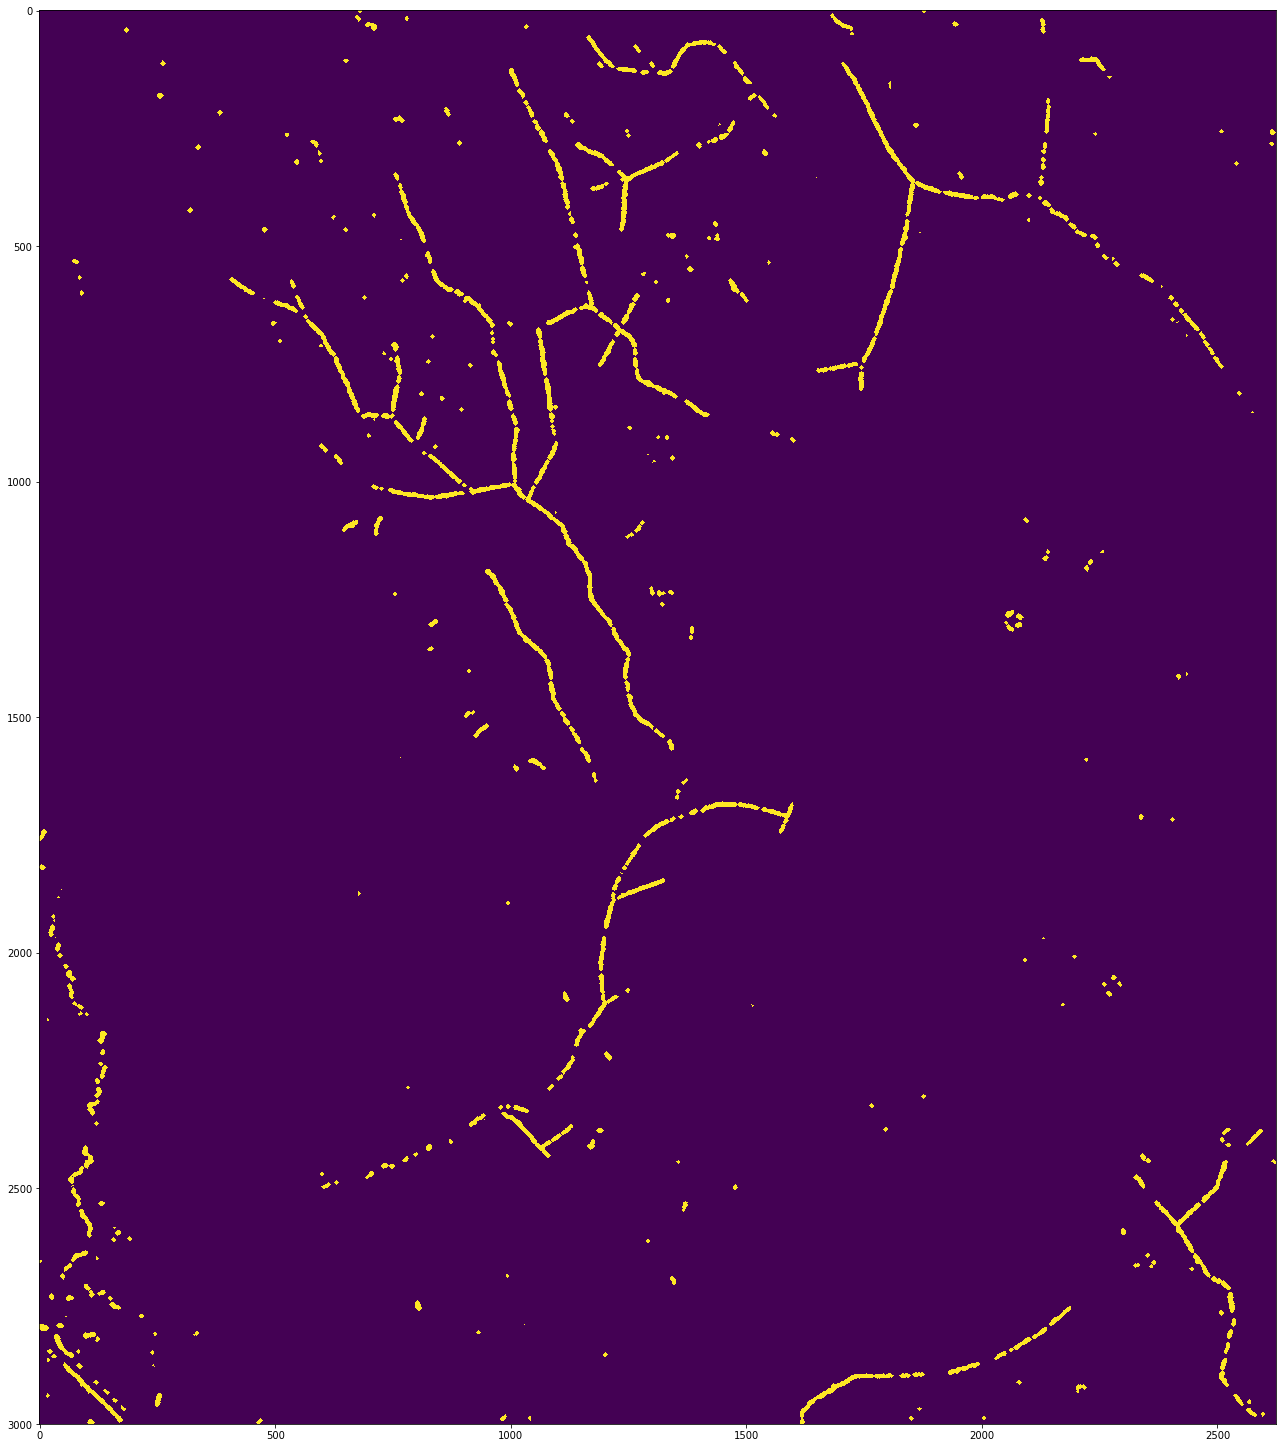

In [109]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(predictionArr)

In [38]:
def create_circular_mask(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    mask[radius][radius] = 0
    kernel[mask] = 1
    return kernel

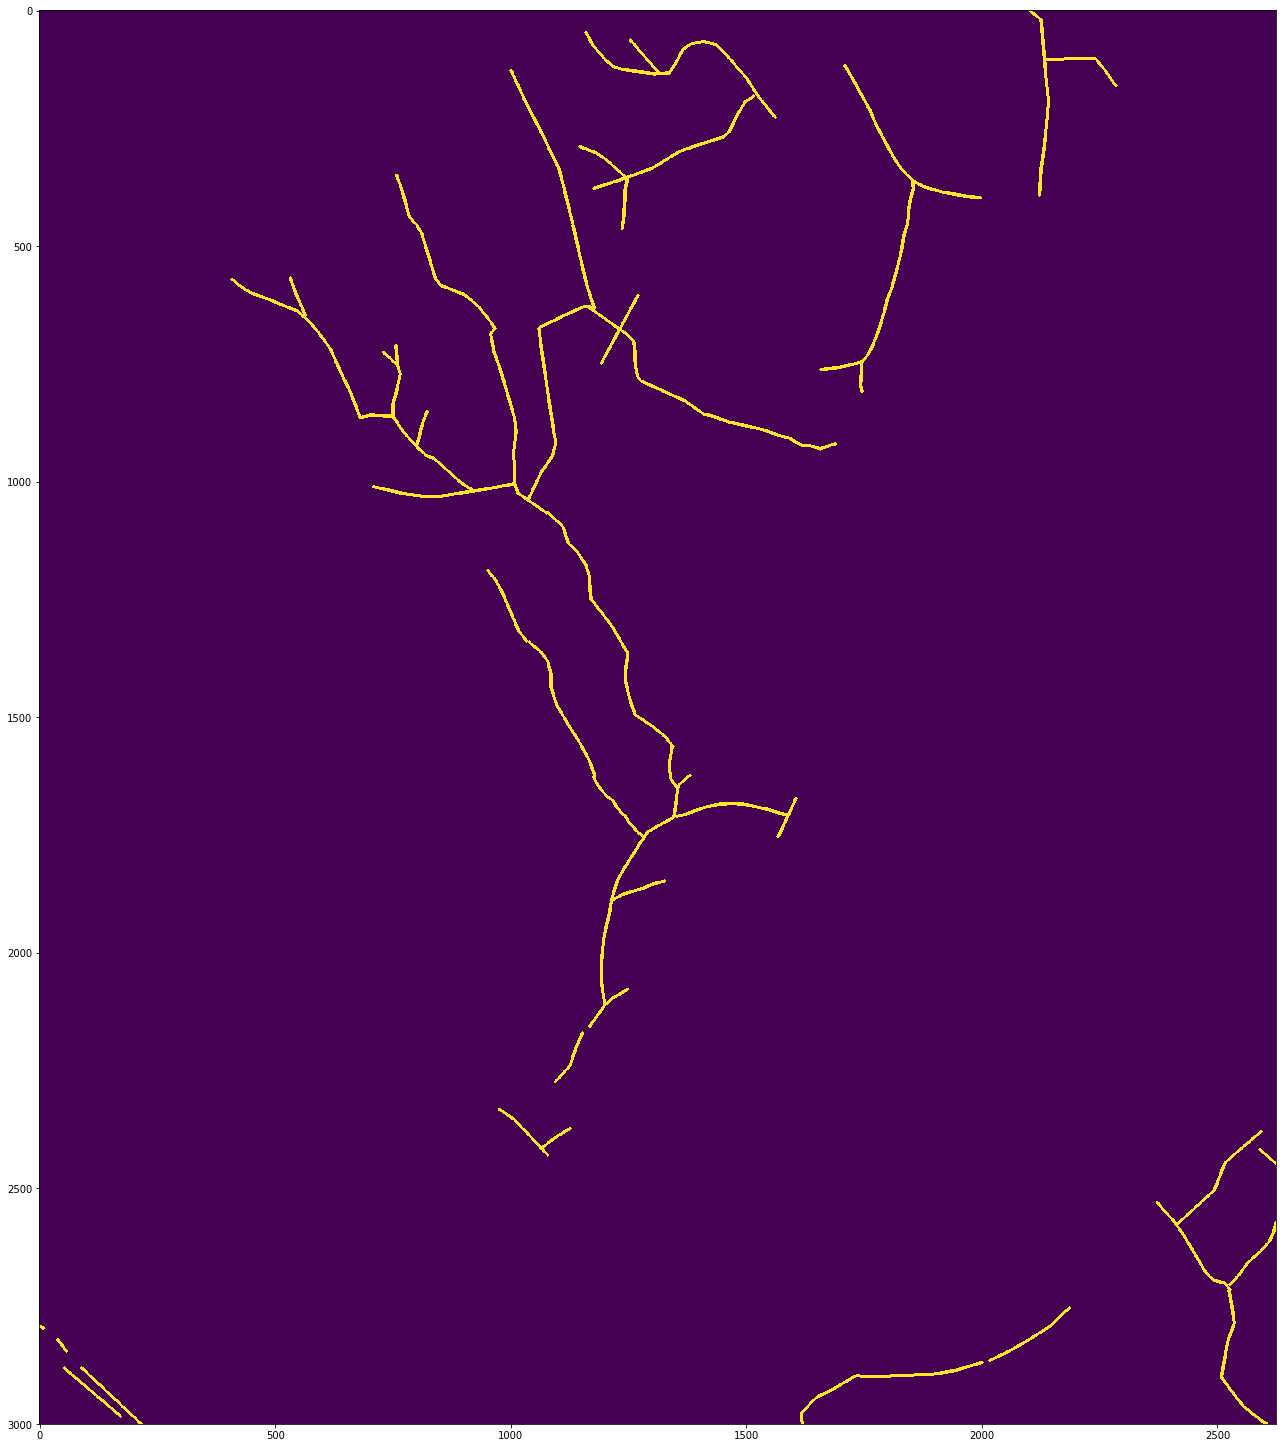

In [40]:
y_test_reshape = y_test.reshape(3000,2625)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(y_test_reshape)

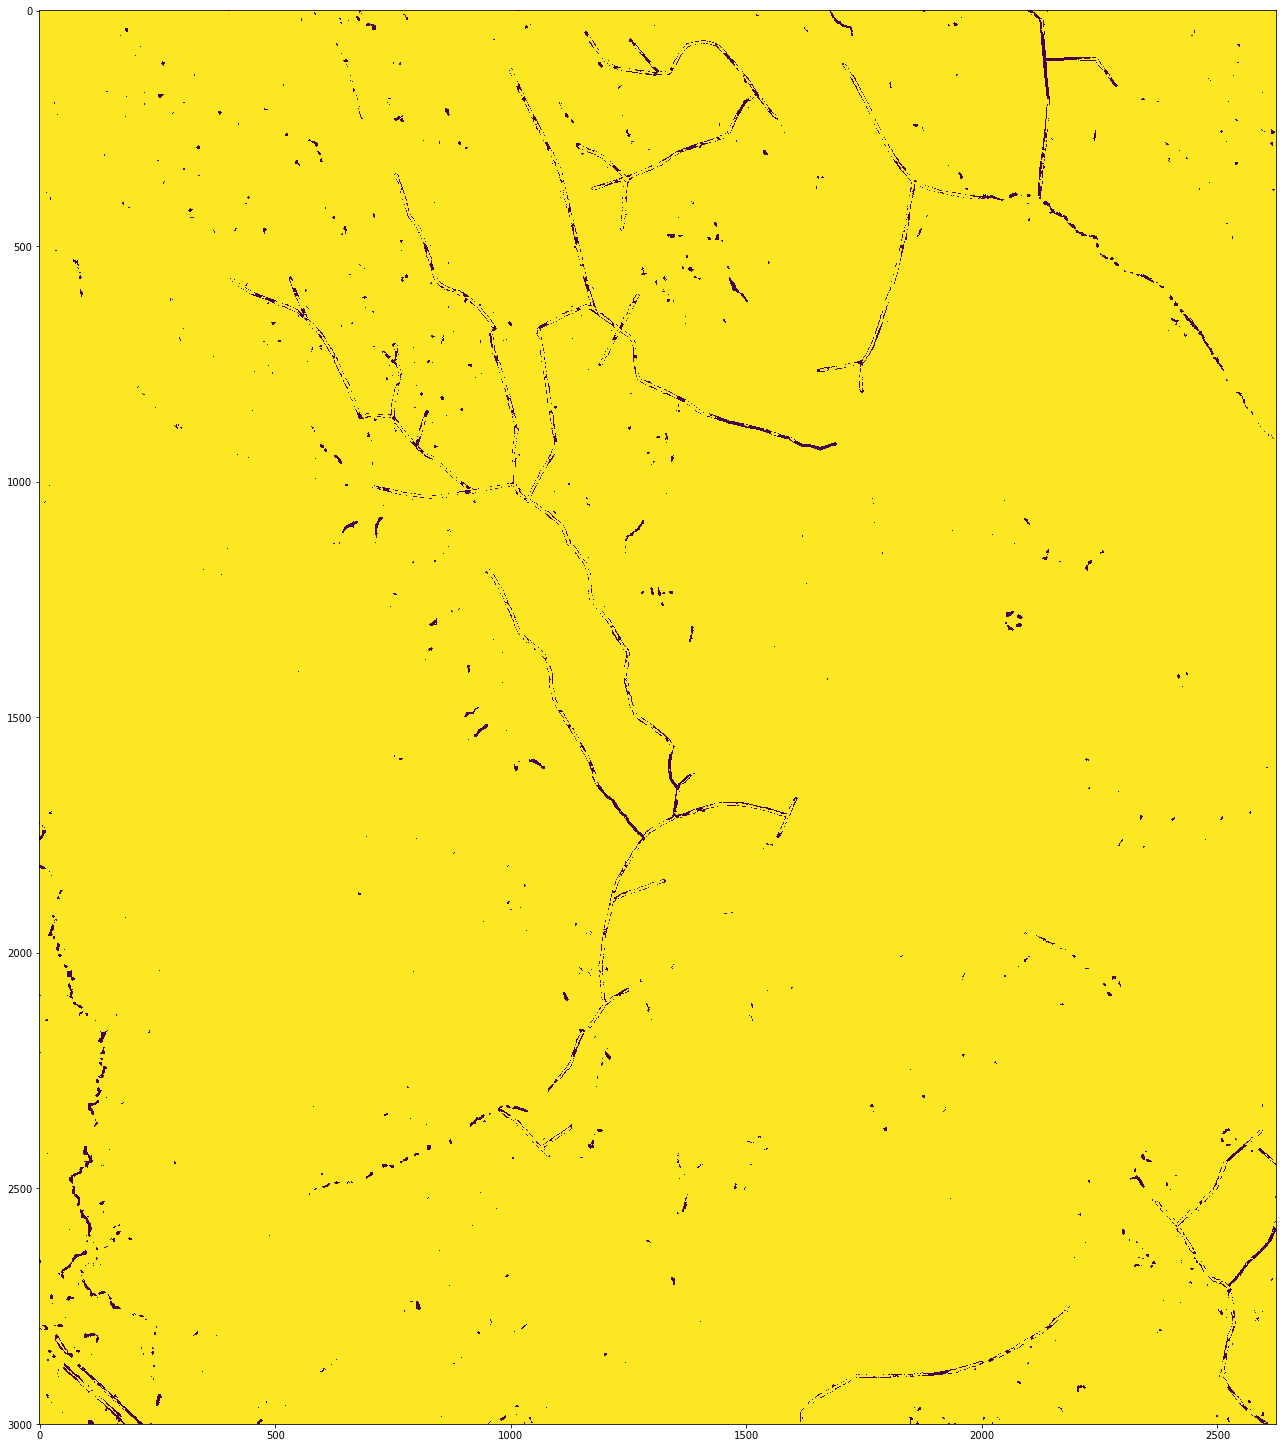

In [41]:
evaluatedArr = np.isclose(predictionArr, y_test_reshape)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(evaluatedArr)

3000
2625


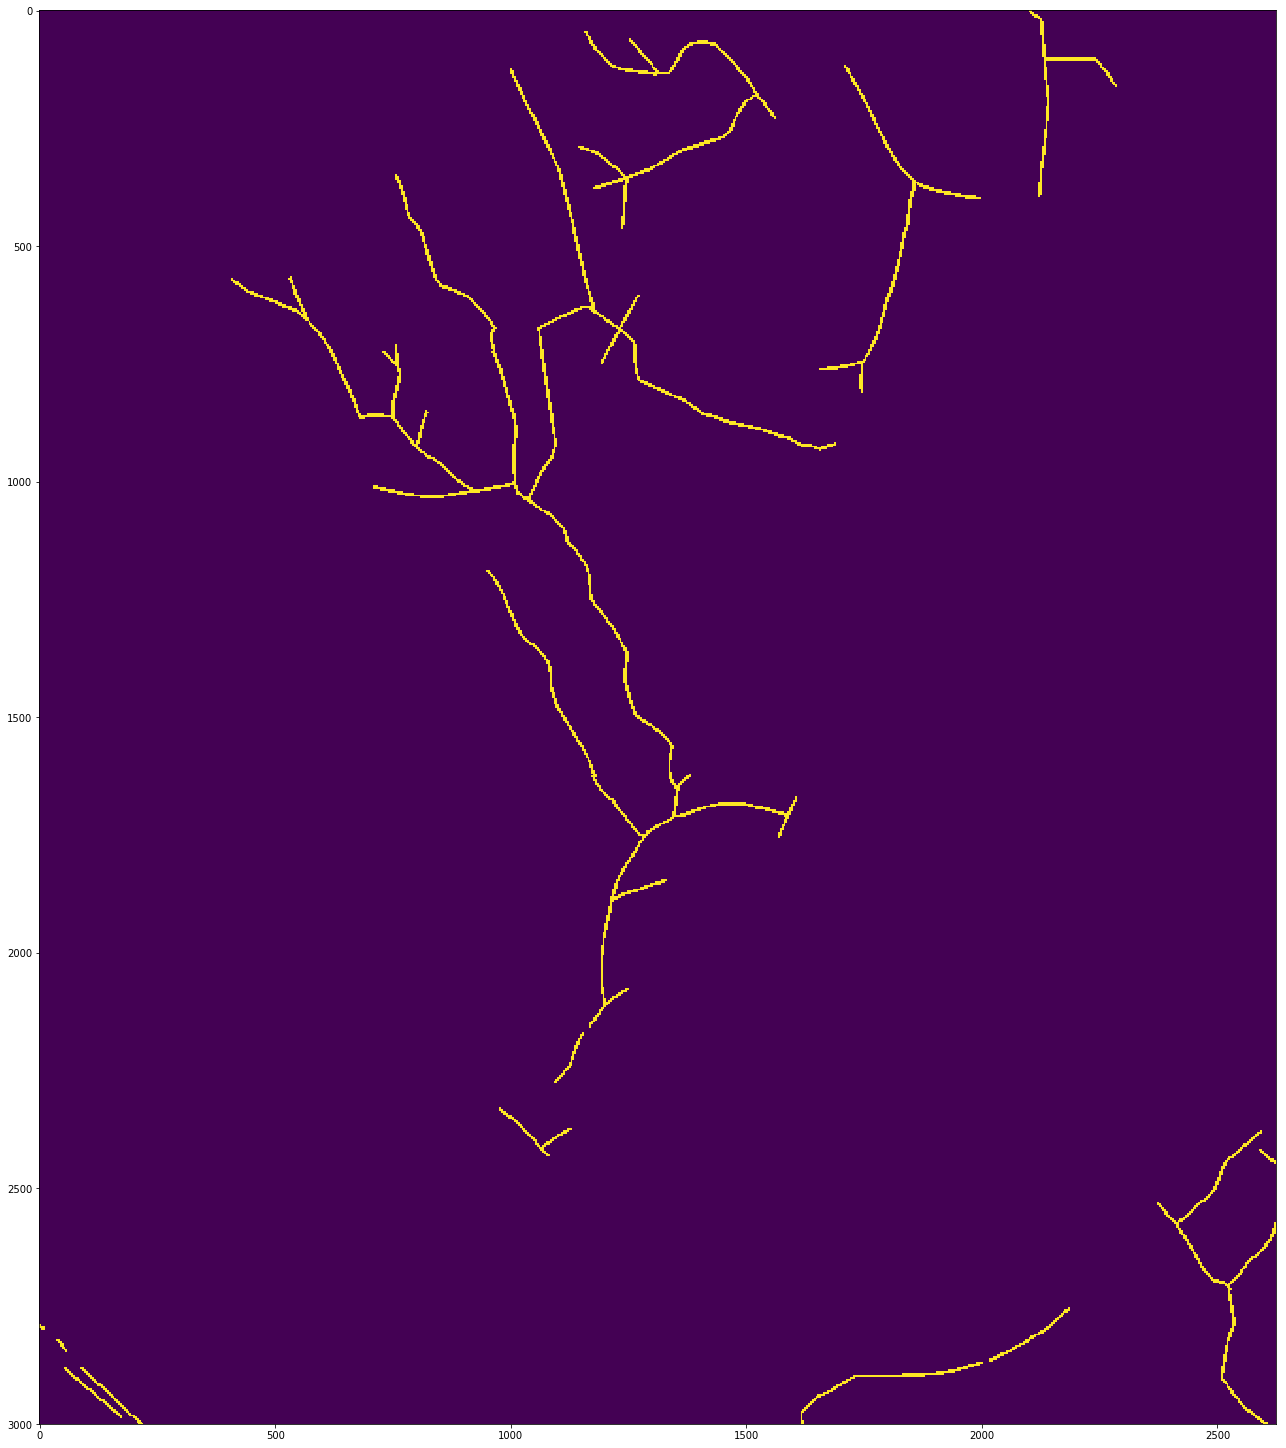

In [140]:
validationZones = rasterToZones(y_test_reshape, 4)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(validationZones)

In [150]:
def rasterToZones(arr, zoneSize):
    newArr = arr.copy()
    print(len(arr))
    print(len(arr[0]))
    for i in range(0, len(arr), zoneSize):
        for j in range(0, len(arr[i]), zoneSize):
            numberOfClassified = 0
            if i < len(arr) - zoneSize and j < len(arr[i]) - zoneSize:
                for k in range(zoneSize):
                    for l in range(zoneSize):
                        if arr[i + k][j + l] == 1:
                            numberOfClassified += 1
                if numberOfClassified > (zoneSize**2)/5:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 1
                else:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 0
    return newArr

3000
2625


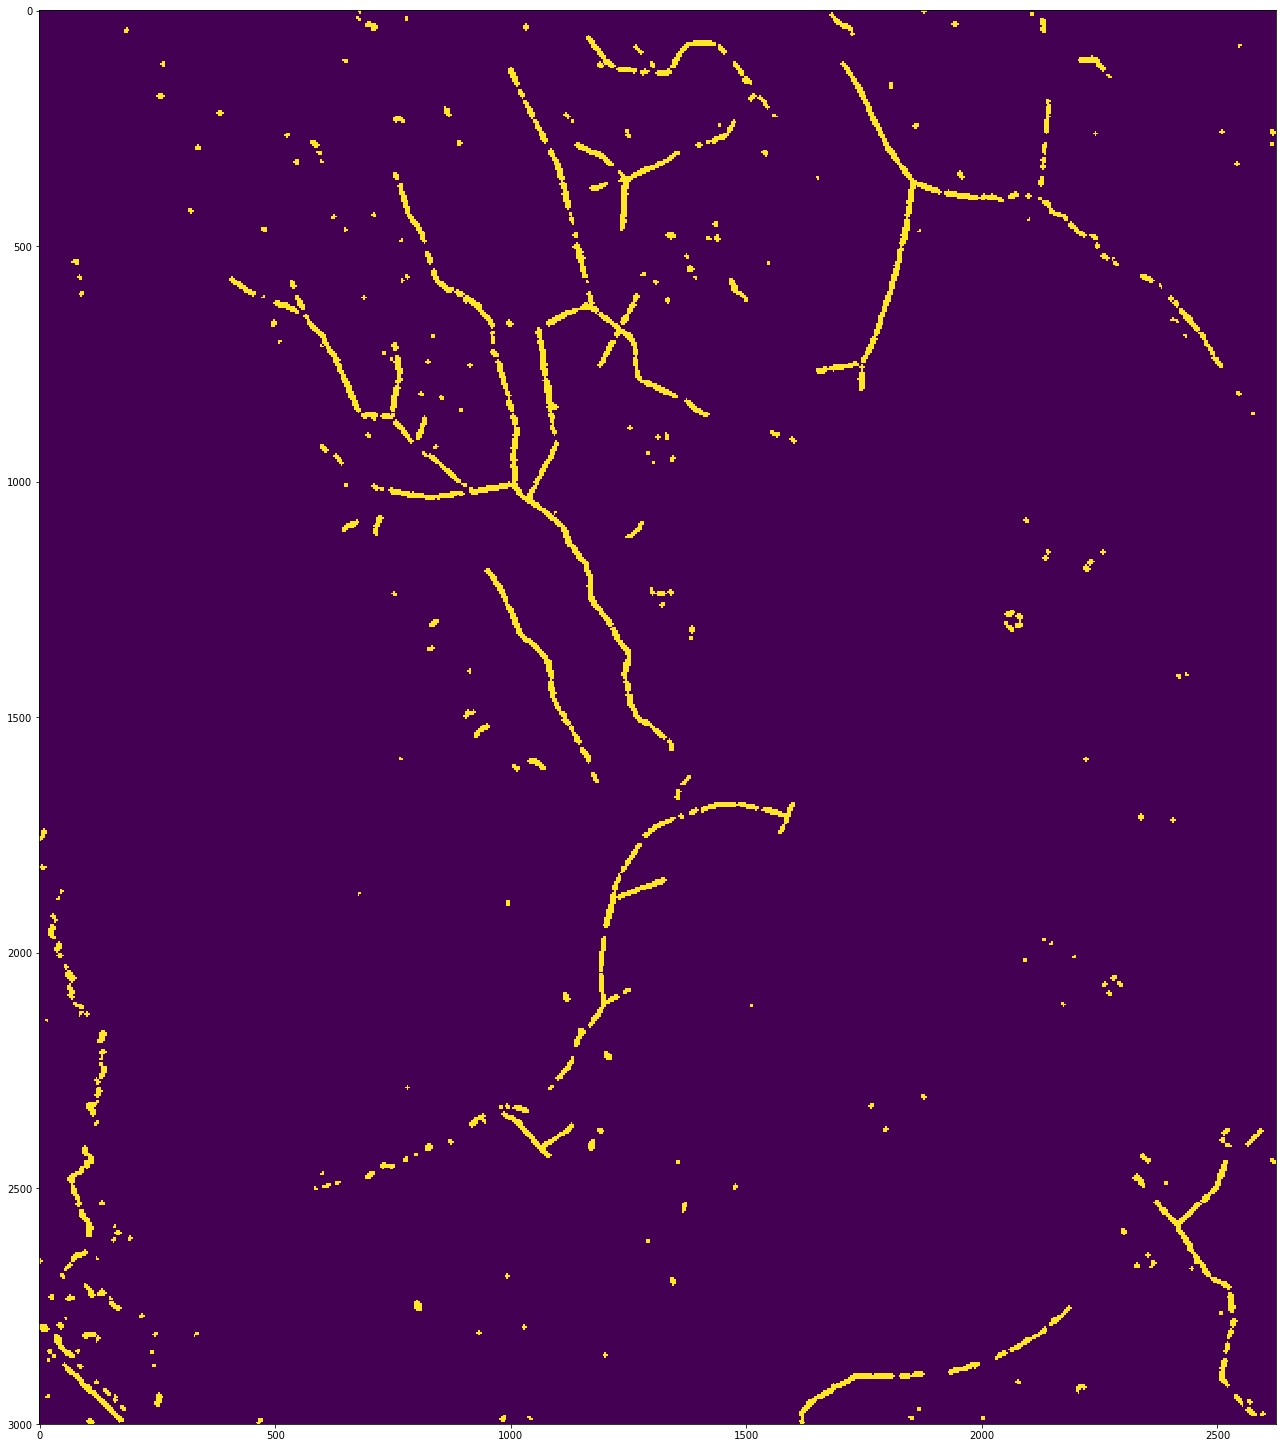

In [151]:
predictionZonesArr = rasterToZones(predictionArr, 4)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(predictionZonesArr)

In [152]:
evaluatedPoints = 0
evaluatedZeroPoints = 0
correctPredictions = 0
correctZeroPredictions = 0
for i in range(len(validationZones)):
    for j in range(len(validationZones[i])):
        if validationZones[i][j] == 1:
            evaluatedPoints += 1
            if predictionZonesArr[i][j] == 1:
                correctPredictions += 1
        else:
            evaluatedZeroPoints += 1
            if predictionZonesArr[i][j] == 0:
                correctZeroPredictions += 1
print("accuracy rate:")
print((correctPredictions + correctZeroPredictions) / (evaluatedPoints + evaluatedZeroPoints))
print("true positive rate:") 
print(correctPredictions/evaluatedPoints)

accuracy rate:
0.9864288253968254
true positive rate:
0.7894323968568427
